# Homework 1 for Security Analytics 
## Author: Kandarp Khandwala - kkhandw1
---
### Decision Trees
- Data:

    * Homework2.csv contains information of static analysis of 99 binary files. 50 files are benign/good and 49 are malicious/bad.
    * The target variable is “label”; its value is either “good” or “bad”. All other columns are features.

- Task:

    * Build a classifier with decision tree. Use the the whole data set for both training and testing purpose. Submit your best model in terms of prediction accuracy.
    * What are the most 10 important features? Why?


In [1]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib.patches as patches
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn import datasets
from IPython.display import Image

%matplotlib inline

## Helper functions

In [24]:
# A function that gives a visual representation of the decision tree
def Decision_Tree_Image(decision_tree, feature_names, name="temp"):
    # Export our decision tree to graphviz format
    dot_file = tree.export_graphviz(decision_tree.tree_, out_file='images/' + name + '.dot', feature_names=feature_names)
    
    # Call graphviz to make an image file from our decision tree
    os.system("dot -Tpng images/" + name + ".dot -o images/" + name + ".png")
    
    # Return the .png image so we can see it
    return Image(filename='images/' + name + '.png')

# A function to plot the data
def Plot_Data(data, v1, v2, tv):
    # Make the plot square
    plt.rcParams['figure.figsize'] = [12.0, 8.0]
    
    # Color
    color = ["red" if x == 0 else "blue" for x in data[tv]]
    
    # Plot and label
    plt.scatter(data[v1], data[v2], c=color, s=50)
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.xlim([min(data[v1]) - 1, max(data[v1]) + 1])
    plt.ylim([min(data[v2]) - .05, max(data[v2]) + .05])
    


In [3]:
def entropy(target):
    # Get the number of users
    n = len(target)
    # Count how frequently each unique value occurs
    counts = np.bincount(target).astype(float)
    # Initialize entropy
    entropy = 0
    # If the split is perfect, return 0
    if len(counts) <= 1 or 0 in counts:
        return entropy
    # Otherwise, for each possible value, update entropy
    for count in counts:
        entropy += math.log(count/n, len(counts)) * count/n
    # Return entropy
    return -1 * entropy

def information_gain(feature, threshold, target):
    # Dealing with numpy arrays makes this slightly easier
    target = np.array(target)
    feature = np.array(feature)
    # Cut the feature vector on the threshold
    feature = (feature < threshold)
    # Initialize information gain with the parent entropy
    ig = entropy(target)
    # For both sides of the threshold, update information gain
    for level, count in zip([0, 1], np.bincount(feature).astype(float)):
        ig -= count/len(feature) * entropy(target[feature == level])
    # Return information gain
    return ig

## Load the data

In [4]:
with open("homework2.csv") as datafile:
    data = pd.read_csv(datafile)

data.head()


,check_sum,compile_date,datadir_IMAGE_DIRECTORY_ENTRY_BASERELOC_size,datadir_IMAGE_DIRECTORY_ENTRY_EXPORT_size,datadir_IMAGE_DIRECTORY_ENTRY_IAT_size,datadir_IMAGE_DIRECTORY_ENTRY_IMPORT_size,datadir_IMAGE_DIRECTORY_ENTRY_RESOURCE_size,debug_size,export_size,generated_check_sum,...,sec_vasize_upx3,size_code,size_image,size_initdata,size_uninit,std_section_names,total_size_pe,virtual_address,virtual_size,virtual_size_2
0,0,585810474,0,0,44,40,0,0,0,98624,...,0.0,13824,180224,43008,65536,0,85504,4096,13352,65536
1,0,1218437803,0,0,468,100,1048,0,0,53913,...,0.0,4096,20480,12288,0,1,20480,4096,3346,2182
2,98299,1297813288,0,0,372,40,1660,28,0,113512,...,0.0,36864,53248,12288,0,1,64512,4096,33504,5156
3,104924,708992537,4612,0,0,2842,6144,0,0,104924,...,0.0,67072,114688,13824,0,0,81920,4096,66596,456
4,150326,1276781438,188,154,308,180,84152,0,154,150326,...,0.0,6656,110592,89088,0,0,97280,4096,6532,2074


## Convert the label into a numeric value

In [5]:
label_numeric = []
for x in data['label']:
    if x.lower() == 'good':
        label_numeric.append(1)
    else:
        label_numeric.append(0)
data['label'] = label_numeric

data['label'].head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

## Separate the params and the label

In [6]:
X = data.drop('label', axis=1)
Y = data["label"]

## Find out the best threshold

In [10]:
def best_threshold(feature, X, Y):
    maximum_ig = 0
    maximum_threshold = 0

    for threshold in X[feature]:
        ig = information_gain(X[feature], threshold, np.array(Y))
        if ig > maximum_ig:
            maximum_ig = ig
            maximum_threshold = threshold

    print("The maximum IG of {} = {} and it occured by splitting on {}".format(feature, maximum_ig, maximum_threshold))
    return maximum_ig 

threshold_feature_map = dict()
for x in X:
    threshold_feature_map[best_threshold(x, X, Y)] = x
    

The maximum IG of check_sum = 0.25760895169765585 and it occured by splitting on 26573
The maximum IG of compile_date = 0.7230631430657407 and it occured by splitting on 1322160635
The maximum IG of datadir_IMAGE_DIRECTORY_ENTRY_BASERELOC_size = 0.30291347056088036 and it occured by splitting on 12
The maximum IG of datadir_IMAGE_DIRECTORY_ENTRY_EXPORT_size = 0.03144417106694686 and it occured by splitting on 154
The maximum IG of datadir_IMAGE_DIRECTORY_ENTRY_IAT_size = 0.27277299175160347 and it occured by splitting on 128
The maximum IG of datadir_IMAGE_DIRECTORY_ENTRY_IMPORT_size = 0.1268921074140372 and it occured by splitting on 60
The maximum IG of datadir_IMAGE_DIRECTORY_ENTRY_RESOURCE_size = 0.13406472945789685 and it occured by splitting on 436
The maximum IG of debug_size = 0.4684446281383585 and it occured by splitting on 28
The maximum IG of export_size = 0.03144417106694686 and it occured by splitting on 154
The maximum IG of generated_check_sum = 0.020804579423572722 and

The maximum IG of sec_rawptr_jimmp1 = 0.01032483169253784 and it occured by splitting on 4096.0
The maximum IG of sec_rawptr_jimmp2 = 0.01032483169253784 and it occured by splitting on 8192.0
The maximum IG of sec_rawptr_lsicbkg = 0.01032483169253784 and it occured by splitting on 51200.0
The maximum IG of sec_rawptr_minatl = 0.010027409469696047 and it occured by splitting on 20992.0
The maximum IG of sec_rawptr_mzphdwa = 0.01032483169253784 and it occured by splitting on 58880.0
The maximum IG of sec_rawptr_packed = 0 and it occured by splitting on 0
The maximum IG of sec_rawptr_page = 0.02020353779403261 and it occured by splitting on 60416.0
The maximum IG of sec_rawptr_pagedata = 0.010027409469696047 and it occured by splitting on 61952.0
The maximum IG of sec_rawptr_pdata = 0.07348667064737535 and it occured by splitting on 2560.0
The maximum IG of sec_rawptr_pex = 0.01032483169253784 and it occured by splitting on 1024.0
The maximum IG of sec_rawptr_ps4 = 0.010027409469696047 an

The maximum IG of sec_vasize_pagedata = 0.010027409469696047 and it occured by splitting on 15372.0
The maximum IG of sec_vasize_pdata = 0.03881283051138873 and it occured by splitting on 36.0
The maximum IG of sec_vasize_pex = 0.01032483169253784 and it occured by splitting on 70981.0
The maximum IG of sec_vasize_ps4 = 0.010027409469696047 and it occured by splitting on 4096.0
The maximum IG of sec_vasize_rdata = 0.07458365755770402 and it occured by splitting on 1700.0
The maximum IG of sec_vasize_reloc = 0.30291347056088036 and it occured by splitting on 12.0
The maximum IG of sec_vasize_rlpack = 0.01032483169253784 and it occured by splitting on 13025.0
The maximum IG of sec_vasize_rsrc = 0.17203132582887365 and it occured by splitting on 436
The maximum IG of sec_vasize_sdata = 0.030533049078414698 and it occured by splitting on 200.0
The maximum IG of sec_vasize_tdata = 0.01032483169253784 and it occured by splitting on 20480.0
The maximum IG of sec_vasize_text = 0.22866659902527

## Select the top 10 features with the most information gain

In [11]:
from collections import OrderedDict

threshold_feature_map = OrderedDict(sorted(threshold_feature_map.items(), reverse=True)[:10])
for k, v in threshold_feature_map.items():
    print(k, v)

0.7230631430657407 compile_date
0.5295674909136757 pe_majorlink
0.4684446281383585 debug_size
0.35918246292626255 pe_char
0.34346159205896043 sec_rawsize_reloc
0.3226822647613829 sec_rawptr_reloc
0.30291347056088036 sec_vasize_reloc
0.27277299175160347 datadir_IMAGE_DIRECTORY_ENTRY_IAT_size
0.25760895169765585 check_sum
0.22866659902527986 sec_vasize_text


## Reduce X to only use the top 10 features

In [17]:
X1 = data[list(threshold_feature_map.values())]
X1.head()

,compile_date,pe_majorlink,debug_size,pe_char,sec_rawsize_reloc,sec_rawptr_reloc,sec_vasize_reloc,datadir_IMAGE_DIRECTORY_ENTRY_IAT_size,check_sum,sec_vasize_text
0,585810474,6,0,271,0.0,0.0,0.0,44,0,13352
1,1218437803,6,0,271,0.0,0.0,0.0,468,0,3346
2,1297813288,6,28,271,0.0,0.0,0.0,372,98299,33504
3,708992537,2,0,33166,5120.0,72192.0,4612.0,0,104924,0
4,1276781438,9,0,258,512.0,96768.0,358.0,308,150326,6532


## Use sklearn to train 

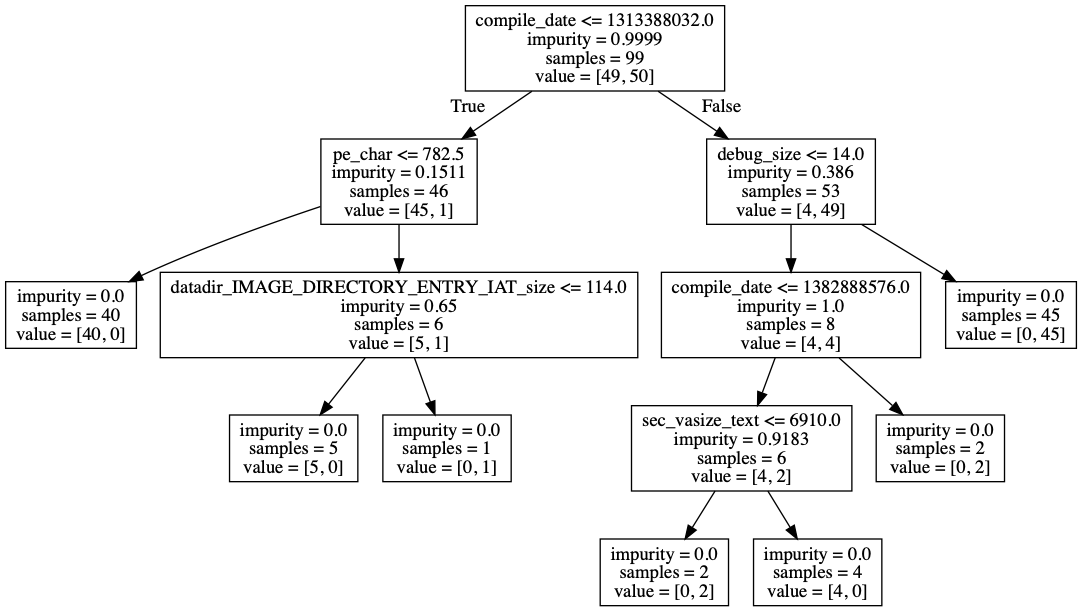

In [36]:
decision_tree = DecisionTreeClassifier(max_depth=5, criterion="entropy")
decision_tree.fit(X1, Y)
Decision_Tree_Image(decision_tree, X1.columns)